# Foundations of AI & ML
## Session 09
### Experiment 3

In this Experiment we will use mnist dataset and will be implementing MLP and BP from the last lab in pytorch.

In [2]:
#importing torch packages
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

**Initialize Hyper-parameters**

Hyper-parameters are the powerful arguments that are set up upfront and will not be updated along with the training of the neural network.

In [3]:
#hyperparameters
input_size = 784       # The image size = 28 x 28 = 784
hidden_size = 500      # The number of nodes at the hidden layer
num_classes = 10       # The number of output classes. In this case, from 0 to 9
num_epochs = 5         # The number of times entire dataset is trained
batch_size = 200       # The size of input data took for one iteration
learning_rate = 0.001  # The speed of convergence

Now, we'll load the MNIST data

In [4]:
#Loading the train set file
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

#Loading the test set file
test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

Processing...
Done!


Loading the dataset

In [5]:
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

#loading the test dataset
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

**Feedforward Neural Network**

The FNN includes two fully-connected layers (i.e. fc1 & fc2) and a non-linear ReLU layer in between. Normally we call this structure 1-hidden layer FNN, without counting the output layer (fc2) in.
By running the forward pass, the input images (x) can go through the neural network and generate a output.

Let's define the network as a Python class. We have to write the __init__() and forward() methods, and PyTorch will automatically generate a backward() method for computing the gradients for the backward pass.

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__() # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size) # 1st Full-Connected Layer
        self.relu = nn.ReLU()# Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):  # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

#### Creating a neural network object

In [8]:
net = Net(input_size, hidden_size, num_classes)

#### Loss and Optimizer

Loss function (criterion) decides how the output can be compared to a class, which determines how good or bad the neural network performs. And the optimizer chooses a way to update the weight in order to converge to find the best weights in this neural network.

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

#### Training the FNN Model

**Forward Pass** The forward pass refers to calculation process, values of the output layers from the inputs data. Its traversing through all neurons from first to last layer.

**Backward Pass** The backward pass refers to process of counting changes in weights, using gradiend descent algorithm or similar. Computation is made from last layer, backward to the first layer.

Epoch [1/200], Batch [100/300], Loss: 0.2331
Epoch [1/200], Batch [200/300], Loss: 0.1972
Epoch [1/200], Batch [300/300], Loss: 0.2548


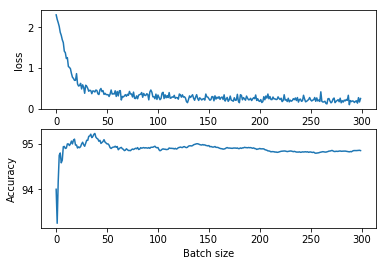

Epoch [2/200], Batch [100/300], Loss: 0.1692
Epoch [2/200], Batch [200/300], Loss: 0.1647
Epoch [2/200], Batch [300/300], Loss: 0.1181


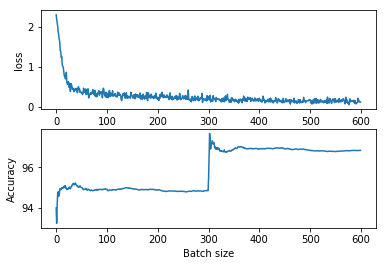

Epoch [3/200], Batch [100/300], Loss: 0.1152
Epoch [3/200], Batch [200/300], Loss: 0.0588
Epoch [3/200], Batch [300/300], Loss: 0.0693


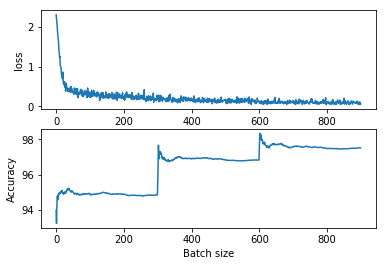

Epoch [4/200], Batch [100/300], Loss: 0.0769
Epoch [4/200], Batch [200/300], Loss: 0.0571
Epoch [4/200], Batch [300/300], Loss: 0.0649


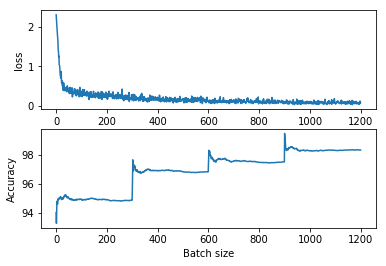

Epoch [5/200], Batch [100/300], Loss: 0.0528
Epoch [5/200], Batch [200/300], Loss: 0.0552
Epoch [5/200], Batch [300/300], Loss: 0.0282


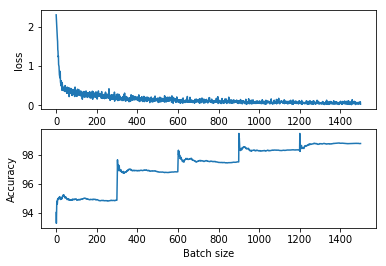

Epoch [6/200], Batch [100/300], Loss: 0.0720
Epoch [6/200], Batch [200/300], Loss: 0.0398
Epoch [6/200], Batch [300/300], Loss: 0.0154


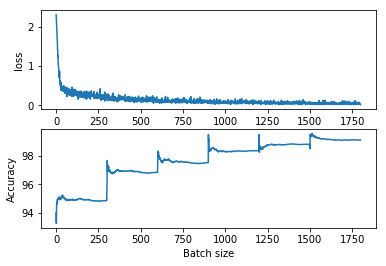

Epoch [7/200], Batch [100/300], Loss: 0.0440
Epoch [7/200], Batch [200/300], Loss: 0.0370
Epoch [7/200], Batch [300/300], Loss: 0.0412


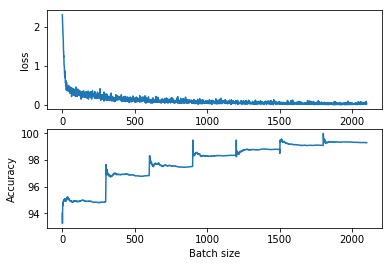

Epoch [8/200], Batch [100/300], Loss: 0.0838
Epoch [8/200], Batch [200/300], Loss: 0.0164
Epoch [8/200], Batch [300/300], Loss: 0.0378


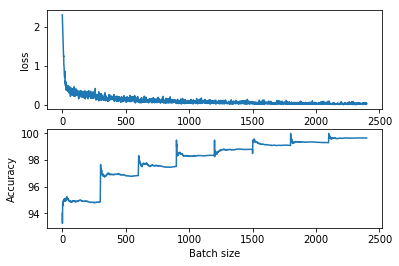

Epoch [9/200], Batch [100/300], Loss: 0.0382
Epoch [9/200], Batch [200/300], Loss: 0.0085
Epoch [9/200], Batch [300/300], Loss: 0.0346


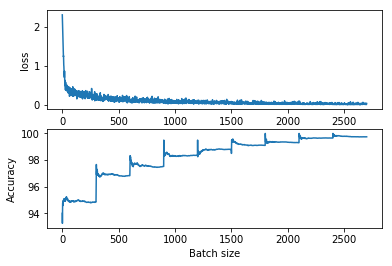

Epoch [10/200], Batch [100/300], Loss: 0.0108
Epoch [10/200], Batch [200/300], Loss: 0.0078
Epoch [10/200], Batch [300/300], Loss: 0.0111


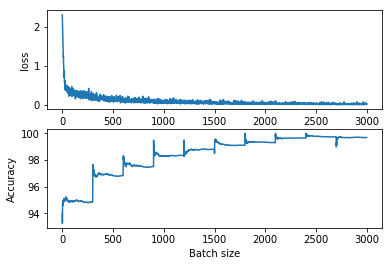

Epoch [11/200], Batch [100/300], Loss: 0.0104
Epoch [11/200], Batch [200/300], Loss: 0.0105
Epoch [11/200], Batch [300/300], Loss: 0.0089


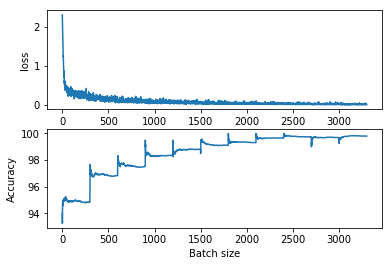

Epoch [12/200], Batch [100/300], Loss: 0.0162
Epoch [12/200], Batch [200/300], Loss: 0.0046
Epoch [12/200], Batch [300/300], Loss: 0.0073


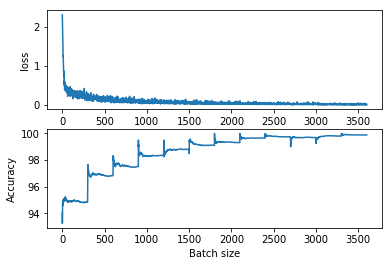

Epoch [13/200], Batch [100/300], Loss: 0.0036
Epoch [13/200], Batch [200/300], Loss: 0.0039
Epoch [13/200], Batch [300/300], Loss: 0.0060


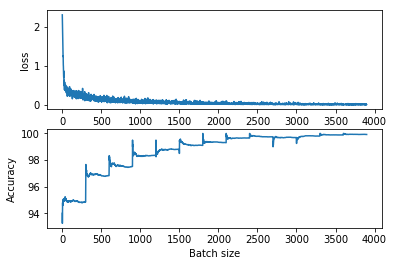

Epoch [14/200], Batch [100/300], Loss: 0.0037
Epoch [14/200], Batch [200/300], Loss: 0.0239
Epoch [14/200], Batch [300/300], Loss: 0.0080


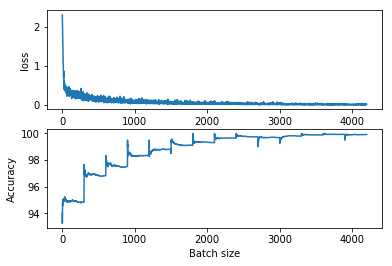

Epoch [15/200], Batch [100/300], Loss: 0.0094
Epoch [15/200], Batch [200/300], Loss: 0.0066
Epoch [15/200], Batch [300/300], Loss: 0.0017


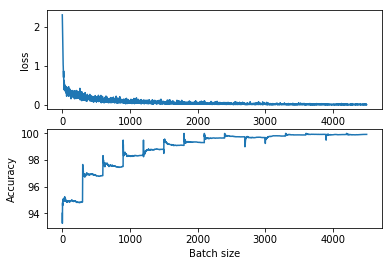

Epoch [16/200], Batch [100/300], Loss: 0.0034
Epoch [16/200], Batch [200/300], Loss: 0.0025
Epoch [16/200], Batch [300/300], Loss: 0.0016


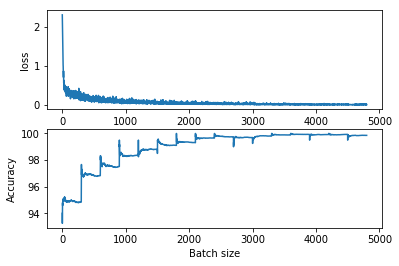

Epoch [17/200], Batch [100/300], Loss: 0.0025
Epoch [17/200], Batch [200/300], Loss: 0.0041
Epoch [17/200], Batch [300/300], Loss: 0.0039


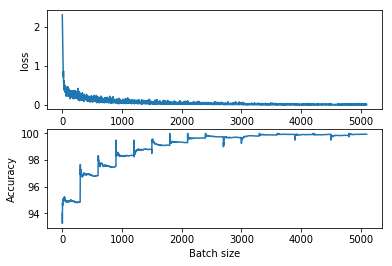

Epoch [18/200], Batch [100/300], Loss: 0.0018
Epoch [18/200], Batch [200/300], Loss: 0.0036
Epoch [18/200], Batch [300/300], Loss: 0.0009


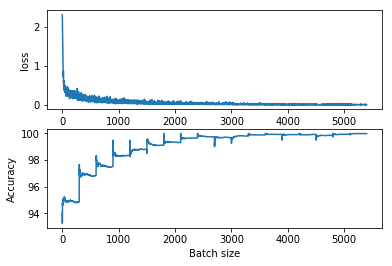

Epoch [19/200], Batch [100/300], Loss: 0.0005
Epoch [19/200], Batch [200/300], Loss: 0.0012
Epoch [19/200], Batch [300/300], Loss: 0.0014


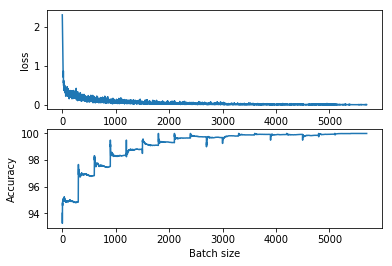

Epoch [20/200], Batch [100/300], Loss: 0.0013
Epoch [20/200], Batch [200/300], Loss: 0.0013
Epoch [20/200], Batch [300/300], Loss: 0.0011


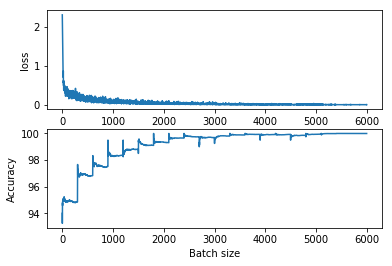

Epoch [21/200], Batch [100/300], Loss: 0.0004
Epoch [21/200], Batch [200/300], Loss: 0.0008
Epoch [21/200], Batch [300/300], Loss: 0.0003


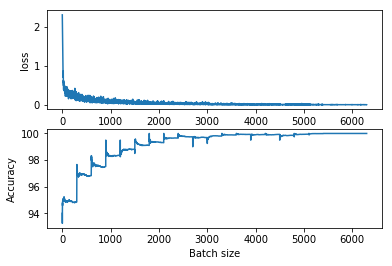

Epoch [22/200], Batch [100/300], Loss: 0.0005
Epoch [22/200], Batch [200/300], Loss: 0.0006
Epoch [22/200], Batch [300/300], Loss: 0.0006


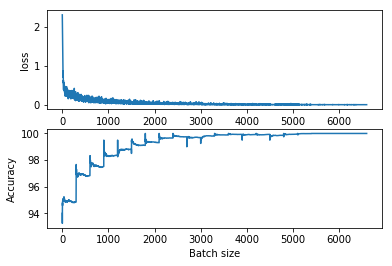

Epoch [23/200], Batch [100/300], Loss: 0.0008
Epoch [23/200], Batch [200/300], Loss: 0.0010
Epoch [23/200], Batch [300/300], Loss: 0.0004


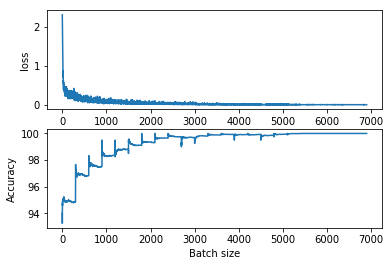

Epoch [24/200], Batch [100/300], Loss: 0.0006
Epoch [24/200], Batch [200/300], Loss: 0.0005
Epoch [24/200], Batch [300/300], Loss: 0.0006


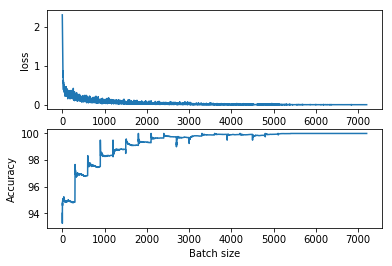

Epoch [25/200], Batch [100/300], Loss: 0.0003
Epoch [25/200], Batch [200/300], Loss: 0.0025
Epoch [25/200], Batch [300/300], Loss: 0.0503


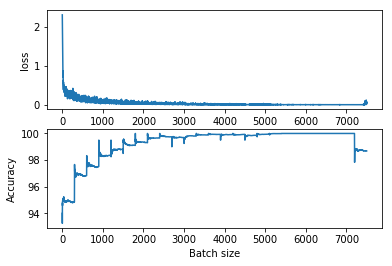

Epoch [26/200], Batch [100/300], Loss: 0.0101
Epoch [26/200], Batch [200/300], Loss: 0.0081
Epoch [26/200], Batch [300/300], Loss: 0.0057


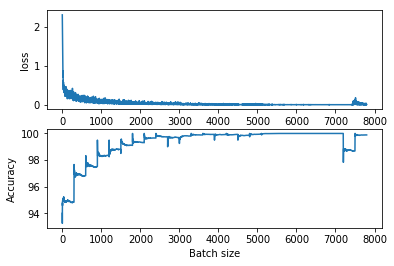

Epoch [27/200], Batch [100/300], Loss: 0.0016
Epoch [27/200], Batch [200/300], Loss: 0.0011
Epoch [27/200], Batch [300/300], Loss: 0.0095


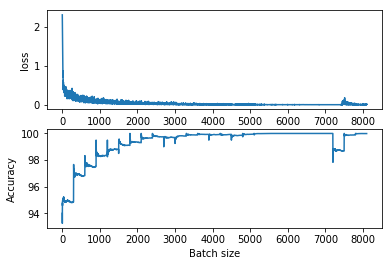

Epoch [28/200], Batch [100/300], Loss: 0.0002
Epoch [28/200], Batch [200/300], Loss: 0.0012
Epoch [28/200], Batch [300/300], Loss: 0.0003


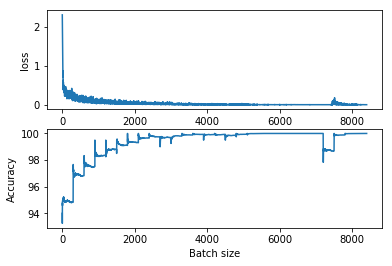

Epoch [29/200], Batch [100/300], Loss: 0.0005
Epoch [29/200], Batch [200/300], Loss: 0.0001
Epoch [29/200], Batch [300/300], Loss: 0.0003


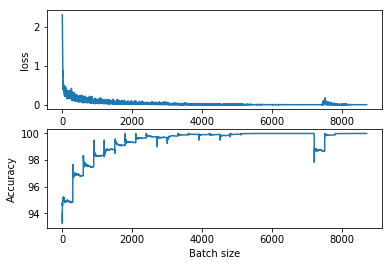

Epoch [30/200], Batch [100/300], Loss: 0.0002
Epoch [30/200], Batch [200/300], Loss: 0.0001
Epoch [30/200], Batch [300/300], Loss: 0.0006


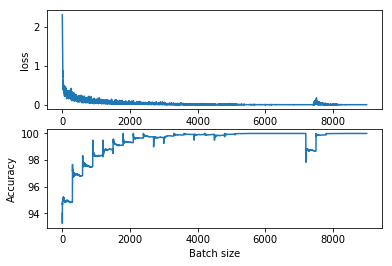

Epoch [31/200], Batch [100/300], Loss: 0.0003
Epoch [31/200], Batch [200/300], Loss: 0.0002
Epoch [31/200], Batch [300/300], Loss: 0.0002


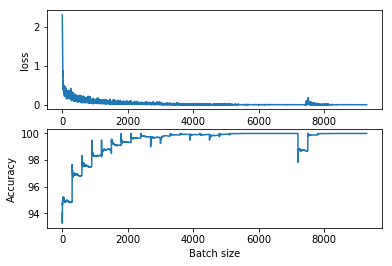

Epoch [32/200], Batch [100/300], Loss: 0.0002
Epoch [32/200], Batch [200/300], Loss: 0.0003
Epoch [32/200], Batch [300/300], Loss: 0.0002


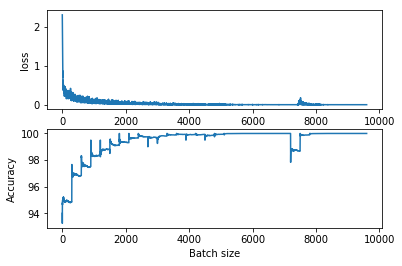

Epoch [33/200], Batch [100/300], Loss: 0.0001
Epoch [33/200], Batch [200/300], Loss: 0.0002
Epoch [33/200], Batch [300/300], Loss: 0.0002


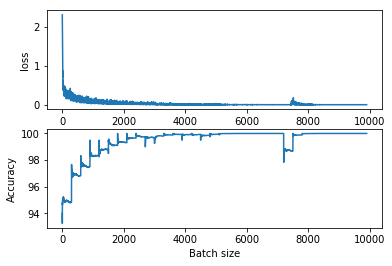

Epoch [34/200], Batch [100/300], Loss: 0.0001
Epoch [34/200], Batch [200/300], Loss: 0.0003
Epoch [34/200], Batch [300/300], Loss: 0.0001


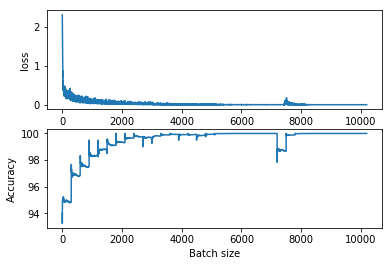

Epoch [35/200], Batch [100/300], Loss: 0.0001
Epoch [35/200], Batch [200/300], Loss: 0.0001
Epoch [35/200], Batch [300/300], Loss: 0.0001


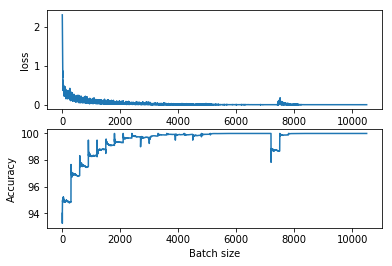

Epoch [36/200], Batch [100/300], Loss: 0.0002
Epoch [36/200], Batch [200/300], Loss: 0.0004
Epoch [36/200], Batch [300/300], Loss: 0.0001


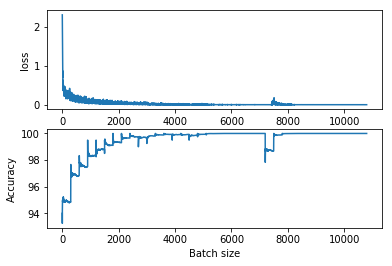

Epoch [37/200], Batch [100/300], Loss: 0.0002
Epoch [37/200], Batch [200/300], Loss: 0.0001
Epoch [37/200], Batch [300/300], Loss: 0.0002


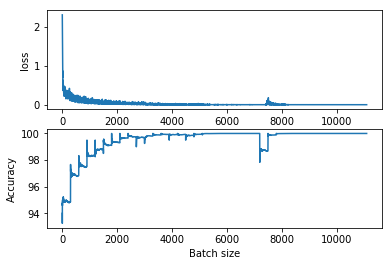

Epoch [38/200], Batch [100/300], Loss: 0.0002
Epoch [38/200], Batch [200/300], Loss: 0.0001
Epoch [38/200], Batch [300/300], Loss: 0.0001


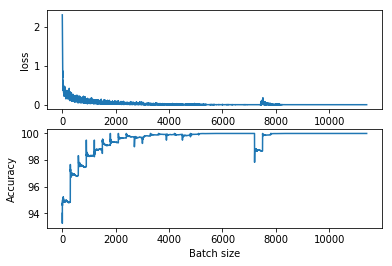

Epoch [39/200], Batch [100/300], Loss: 0.0002
Epoch [39/200], Batch [200/300], Loss: 0.0001
Epoch [39/200], Batch [300/300], Loss: 0.0002


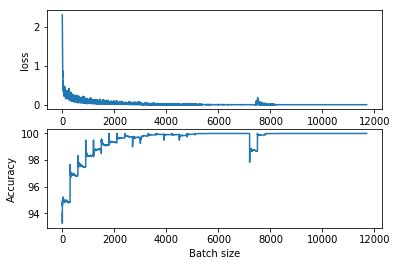

Epoch [40/200], Batch [100/300], Loss: 0.0001
Epoch [40/200], Batch [200/300], Loss: 0.0001
Epoch [40/200], Batch [300/300], Loss: 0.0001


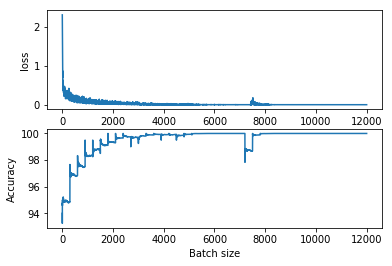

Epoch [41/200], Batch [100/300], Loss: 0.0002
Epoch [41/200], Batch [200/300], Loss: 0.0001
Epoch [41/200], Batch [300/300], Loss: 0.0001


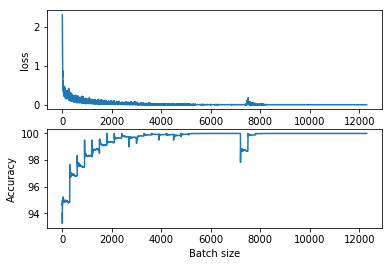

Epoch [42/200], Batch [100/300], Loss: 0.0001
Epoch [42/200], Batch [200/300], Loss: 0.0001
Epoch [42/200], Batch [300/300], Loss: 0.0001


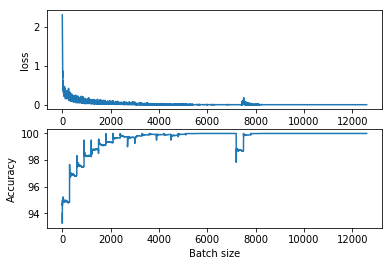

Epoch [43/200], Batch [100/300], Loss: 0.0001
Epoch [43/200], Batch [200/300], Loss: 0.0001
Epoch [43/200], Batch [300/300], Loss: 0.0001


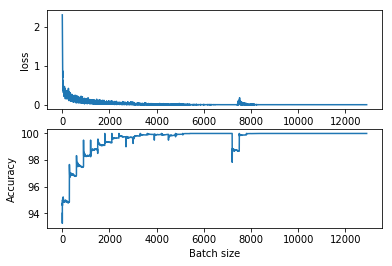

Epoch [44/200], Batch [100/300], Loss: 0.0000
Epoch [44/200], Batch [200/300], Loss: 0.0001
Epoch [44/200], Batch [300/300], Loss: 0.0000


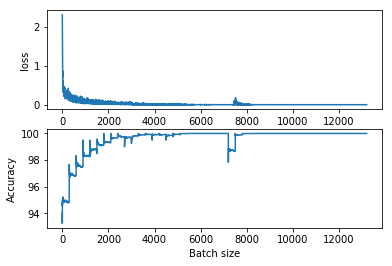

Epoch [45/200], Batch [100/300], Loss: 0.0000
Epoch [45/200], Batch [200/300], Loss: 0.0001
Epoch [45/200], Batch [300/300], Loss: 0.0000


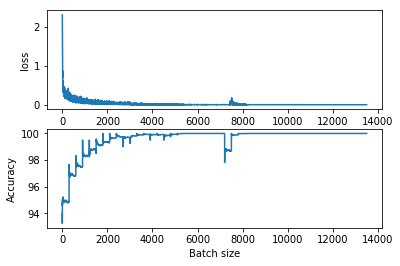

Epoch [46/200], Batch [100/300], Loss: 0.0000
Epoch [46/200], Batch [200/300], Loss: 0.0001
Epoch [46/200], Batch [300/300], Loss: 0.0001


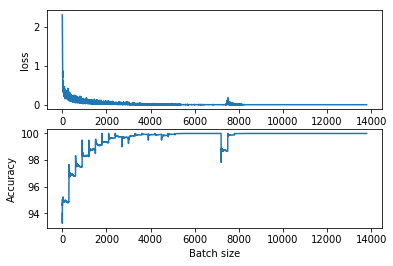

Epoch [47/200], Batch [100/300], Loss: 0.0000
Epoch [47/200], Batch [200/300], Loss: 0.0001
Epoch [47/200], Batch [300/300], Loss: 0.0000


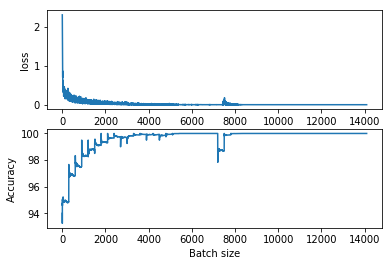

Epoch [48/200], Batch [100/300], Loss: 0.0000
Epoch [48/200], Batch [200/300], Loss: 0.0000
Epoch [48/200], Batch [300/300], Loss: 0.0000


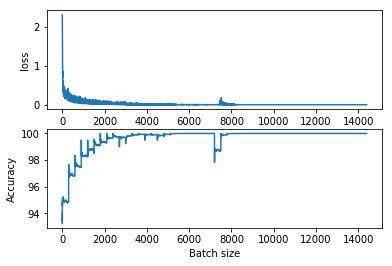

Epoch [49/200], Batch [100/300], Loss: 0.0000
Epoch [49/200], Batch [200/300], Loss: 0.0627
Epoch [49/200], Batch [300/300], Loss: 0.0164


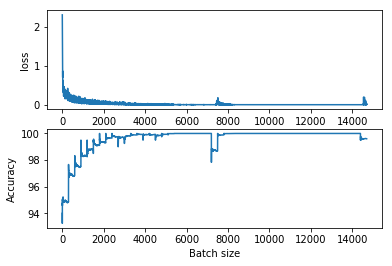

Epoch [50/200], Batch [100/300], Loss: 0.0035
Epoch [50/200], Batch [200/300], Loss: 0.0023
Epoch [50/200], Batch [300/300], Loss: 0.0280


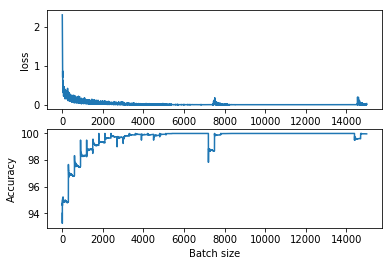

Epoch [51/200], Batch [100/300], Loss: 0.0002
Epoch [51/200], Batch [200/300], Loss: 0.0002
Epoch [51/200], Batch [300/300], Loss: 0.0008


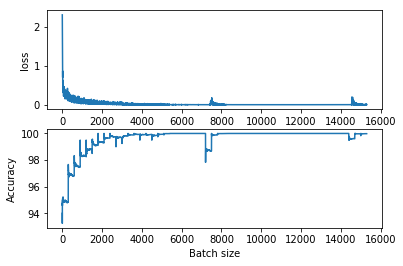

Epoch [52/200], Batch [100/300], Loss: 0.0004
Epoch [52/200], Batch [200/300], Loss: 0.0001
Epoch [52/200], Batch [300/300], Loss: 0.0000


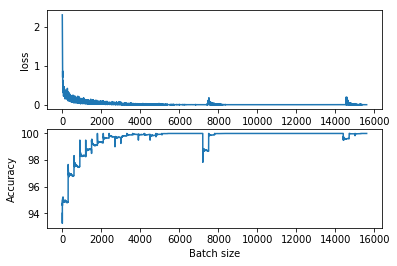

Epoch [53/200], Batch [100/300], Loss: 0.0001
Epoch [53/200], Batch [200/300], Loss: 0.0001
Epoch [53/200], Batch [300/300], Loss: 0.0001


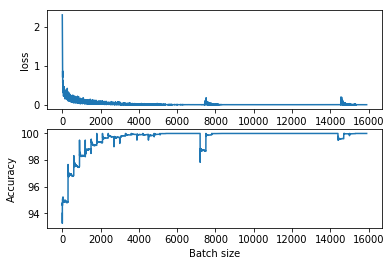

Epoch [54/200], Batch [100/300], Loss: 0.0000
Epoch [54/200], Batch [200/300], Loss: 0.0001
Epoch [54/200], Batch [300/300], Loss: 0.0001


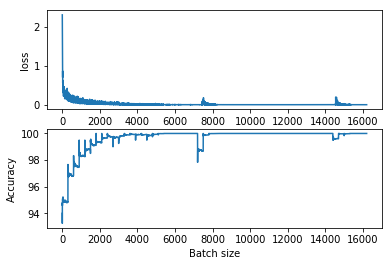

Epoch [55/200], Batch [100/300], Loss: 0.0001
Epoch [55/200], Batch [200/300], Loss: 0.0000
Epoch [55/200], Batch [300/300], Loss: 0.0001


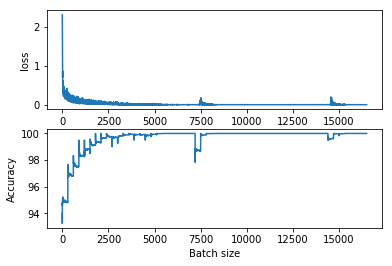

Epoch [56/200], Batch [100/300], Loss: 0.0001
Epoch [56/200], Batch [200/300], Loss: 0.0001
Epoch [56/200], Batch [300/300], Loss: 0.0001


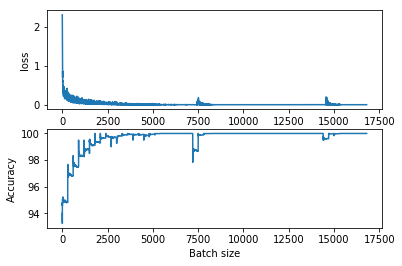

Epoch [57/200], Batch [100/300], Loss: 0.0001
Epoch [57/200], Batch [200/300], Loss: 0.0001
Epoch [57/200], Batch [300/300], Loss: 0.0001


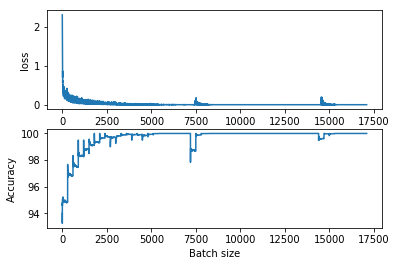

Epoch [58/200], Batch [100/300], Loss: 0.0001
Epoch [58/200], Batch [200/300], Loss: 0.0000
Epoch [58/200], Batch [300/300], Loss: 0.0000


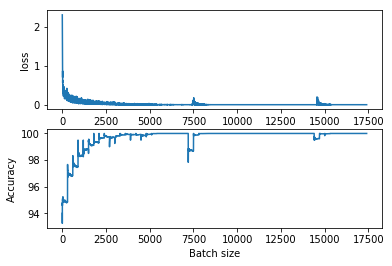

Epoch [59/200], Batch [100/300], Loss: 0.0001
Epoch [59/200], Batch [200/300], Loss: 0.0000
Epoch [59/200], Batch [300/300], Loss: 0.0001


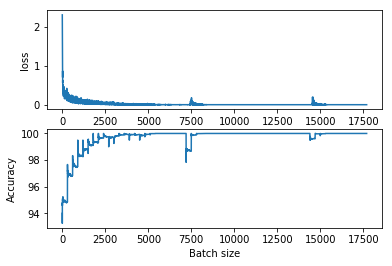

Epoch [60/200], Batch [100/300], Loss: 0.0000
Epoch [60/200], Batch [200/300], Loss: 0.0001
Epoch [60/200], Batch [300/300], Loss: 0.0001


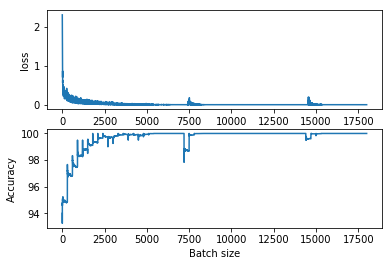

Epoch [61/200], Batch [100/300], Loss: 0.0000
Epoch [61/200], Batch [200/300], Loss: 0.0001
Epoch [61/200], Batch [300/300], Loss: 0.0001


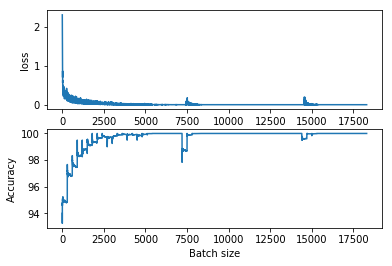

Epoch [62/200], Batch [100/300], Loss: 0.0000
Epoch [62/200], Batch [200/300], Loss: 0.0000
Epoch [62/200], Batch [300/300], Loss: 0.0000


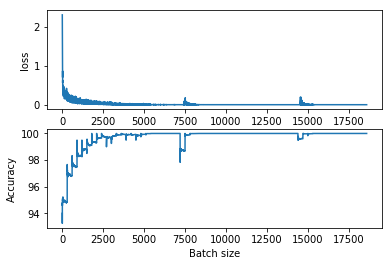

Epoch [63/200], Batch [100/300], Loss: 0.0000
Epoch [63/200], Batch [200/300], Loss: 0.0000
Epoch [63/200], Batch [300/300], Loss: 0.0001


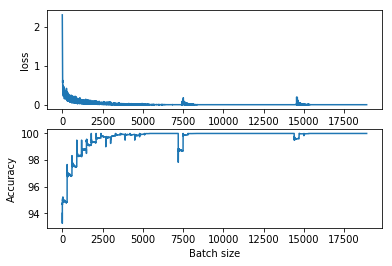

Epoch [64/200], Batch [100/300], Loss: 0.0000
Epoch [64/200], Batch [200/300], Loss: 0.0000
Epoch [64/200], Batch [300/300], Loss: 0.0000


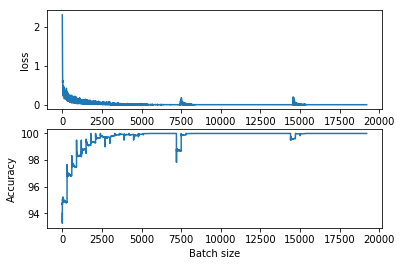

Epoch [65/200], Batch [100/300], Loss: 0.0000
Epoch [65/200], Batch [200/300], Loss: 0.0000
Epoch [65/200], Batch [300/300], Loss: 0.0000


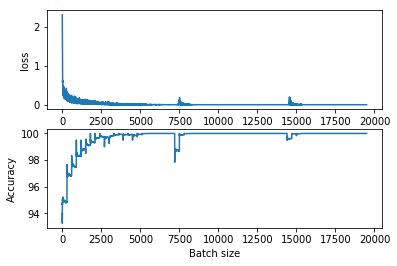

Epoch [66/200], Batch [100/300], Loss: 0.0000
Epoch [66/200], Batch [200/300], Loss: 0.0000
Epoch [66/200], Batch [300/300], Loss: 0.0000


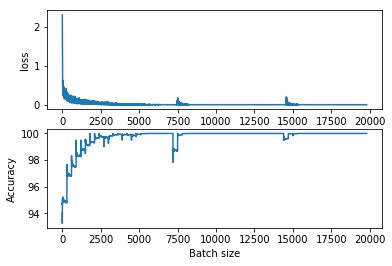

Epoch [67/200], Batch [100/300], Loss: 0.0000
Epoch [67/200], Batch [200/300], Loss: 0.0000
Epoch [67/200], Batch [300/300], Loss: 0.0000


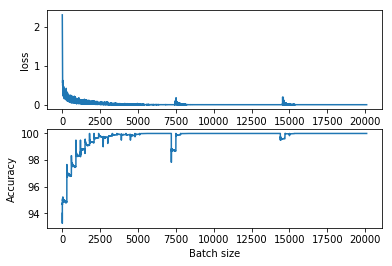

Epoch [68/200], Batch [100/300], Loss: 0.0000
Epoch [68/200], Batch [200/300], Loss: 0.0000
Epoch [68/200], Batch [300/300], Loss: 0.0000


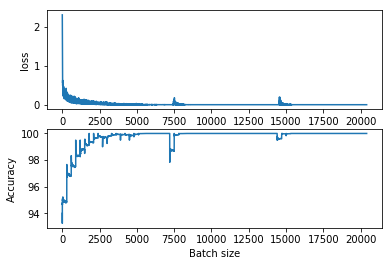

Epoch [69/200], Batch [100/300], Loss: 0.0000
Epoch [69/200], Batch [200/300], Loss: 0.0000
Epoch [69/200], Batch [300/300], Loss: 0.0000


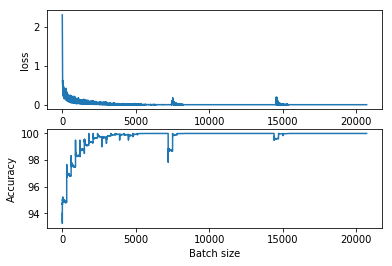

Epoch [70/200], Batch [100/300], Loss: 0.0000
Epoch [70/200], Batch [200/300], Loss: 0.0000
Epoch [70/200], Batch [300/300], Loss: 0.0000


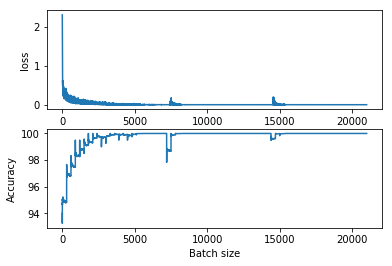

Epoch [71/200], Batch [100/300], Loss: 0.0000
Epoch [71/200], Batch [200/300], Loss: 0.0000
Epoch [71/200], Batch [300/300], Loss: 0.0000


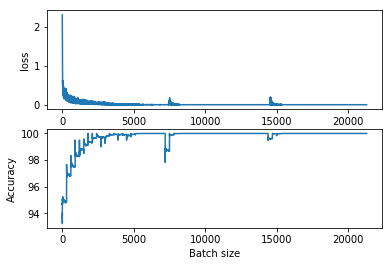

Epoch [72/200], Batch [100/300], Loss: 0.0000
Epoch [72/200], Batch [200/300], Loss: 0.0000
Epoch [72/200], Batch [300/300], Loss: 0.0000


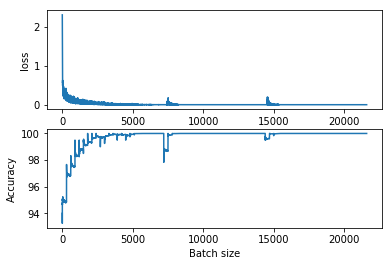

Epoch [73/200], Batch [100/300], Loss: 0.0000
Epoch [73/200], Batch [200/300], Loss: 0.0000
Epoch [73/200], Batch [300/300], Loss: 0.0000


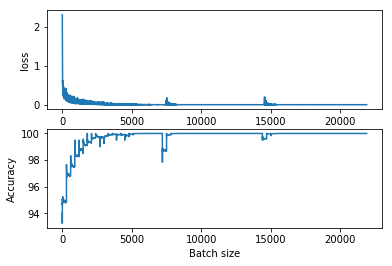

Epoch [74/200], Batch [100/300], Loss: 0.0000
Epoch [74/200], Batch [200/300], Loss: 0.0000
Epoch [74/200], Batch [300/300], Loss: 0.0000


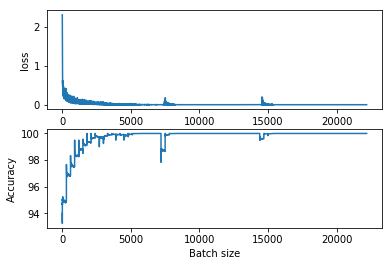

Epoch [75/200], Batch [100/300], Loss: 0.0000
Epoch [75/200], Batch [200/300], Loss: 0.0000
Epoch [75/200], Batch [300/300], Loss: 0.0000


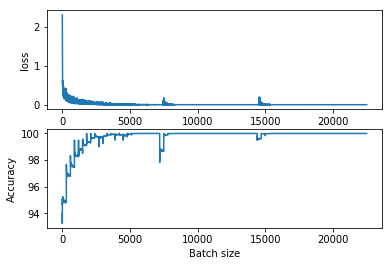

Epoch [76/200], Batch [100/300], Loss: 0.0000
Epoch [76/200], Batch [200/300], Loss: 0.0000
Epoch [76/200], Batch [300/300], Loss: 0.0000


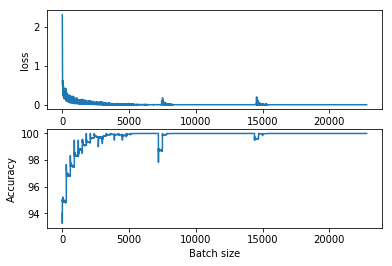

Epoch [77/200], Batch [100/300], Loss: 0.0000
Epoch [77/200], Batch [200/300], Loss: 0.0000
Epoch [77/200], Batch [300/300], Loss: 0.0000


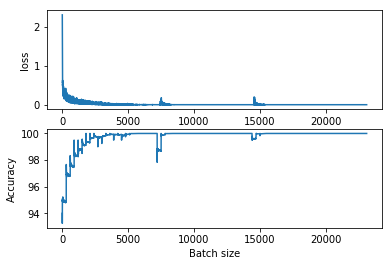

Epoch [78/200], Batch [100/300], Loss: 0.0000
Epoch [78/200], Batch [200/300], Loss: 0.0000
Epoch [78/200], Batch [300/300], Loss: 0.0000


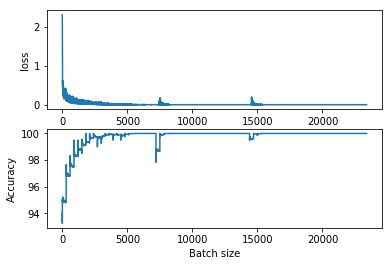

Epoch [79/200], Batch [100/300], Loss: 0.0000
Epoch [79/200], Batch [200/300], Loss: 0.0000
Epoch [79/200], Batch [300/300], Loss: 0.0000


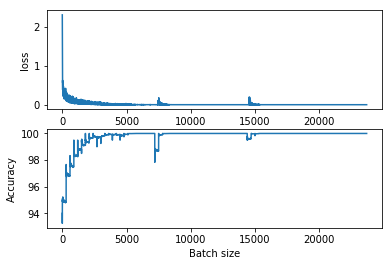

Epoch [80/200], Batch [100/300], Loss: 0.0000
Epoch [80/200], Batch [200/300], Loss: 0.0000
Epoch [80/200], Batch [300/300], Loss: 0.0000


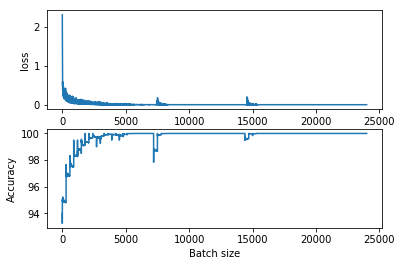

Epoch [81/200], Batch [100/300], Loss: 0.0000
Epoch [81/200], Batch [200/300], Loss: 0.0000
Epoch [81/200], Batch [300/300], Loss: 0.0000


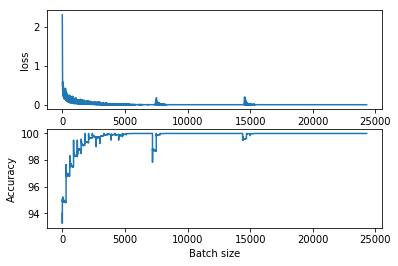

Epoch [82/200], Batch [100/300], Loss: 0.0000
Epoch [82/200], Batch [200/300], Loss: 0.0000
Epoch [82/200], Batch [300/300], Loss: 0.0000


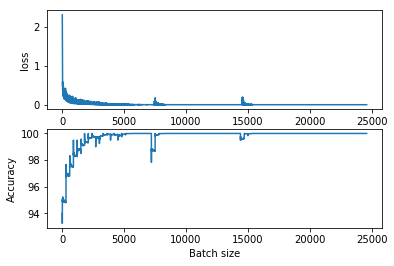

Epoch [83/200], Batch [100/300], Loss: 0.0000
Epoch [83/200], Batch [200/300], Loss: 0.0000
Epoch [83/200], Batch [300/300], Loss: 0.0000


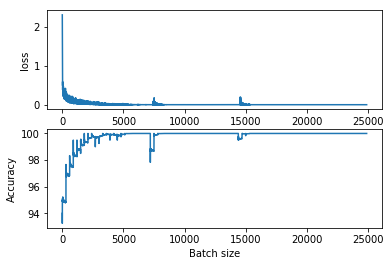

Epoch [84/200], Batch [100/300], Loss: 0.0000
Epoch [84/200], Batch [200/300], Loss: 0.0000
Epoch [84/200], Batch [300/300], Loss: 0.0000


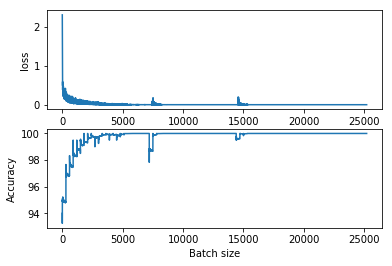

Epoch [85/200], Batch [100/300], Loss: 0.0000
Epoch [85/200], Batch [200/300], Loss: 0.0000
Epoch [85/200], Batch [300/300], Loss: 0.0000


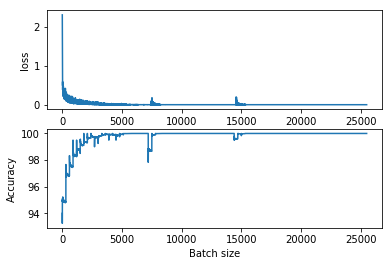

Epoch [86/200], Batch [100/300], Loss: 0.0000
Epoch [86/200], Batch [200/300], Loss: 0.0000
Epoch [86/200], Batch [300/300], Loss: 0.0000


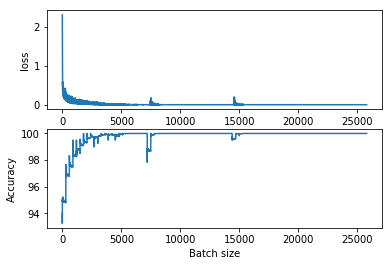

Epoch [87/200], Batch [100/300], Loss: 0.0000
Epoch [87/200], Batch [200/300], Loss: 0.0000
Epoch [87/200], Batch [300/300], Loss: 0.0000


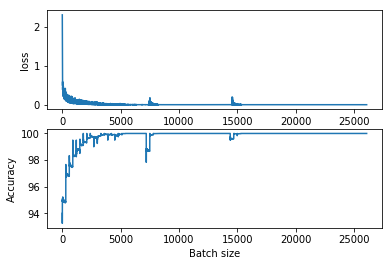

Epoch [88/200], Batch [100/300], Loss: 0.0000
Epoch [88/200], Batch [200/300], Loss: 0.0000
Epoch [88/200], Batch [300/300], Loss: 0.0000


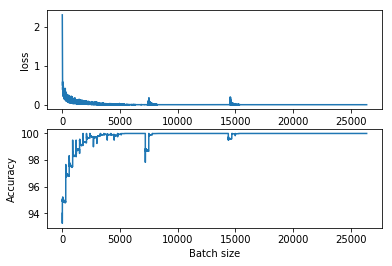

Epoch [89/200], Batch [100/300], Loss: 0.0000
Epoch [89/200], Batch [200/300], Loss: 0.0000
Epoch [89/200], Batch [300/300], Loss: 0.0000


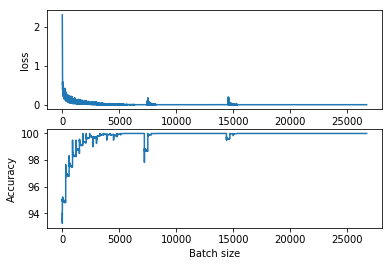

Epoch [90/200], Batch [100/300], Loss: 0.0000
Epoch [90/200], Batch [200/300], Loss: 0.0000
Epoch [90/200], Batch [300/300], Loss: 0.0000


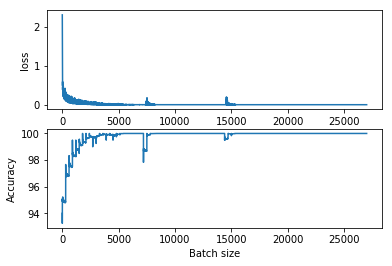

Epoch [91/200], Batch [100/300], Loss: 0.0000
Epoch [91/200], Batch [200/300], Loss: 0.0000
Epoch [91/200], Batch [300/300], Loss: 0.0000


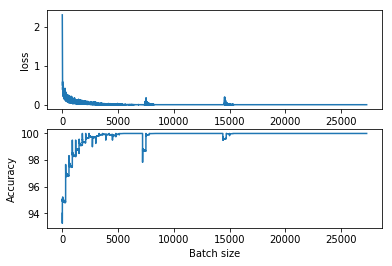

Epoch [92/200], Batch [100/300], Loss: 0.0000
Epoch [92/200], Batch [200/300], Loss: 0.0000
Epoch [92/200], Batch [300/300], Loss: 0.0000


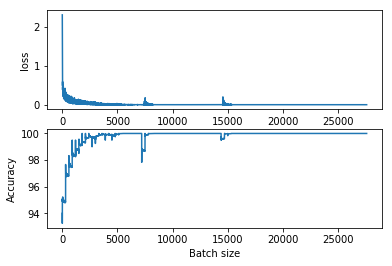

Epoch [93/200], Batch [100/300], Loss: 0.0000
Epoch [93/200], Batch [200/300], Loss: 0.0002
Epoch [93/200], Batch [300/300], Loss: 0.0123


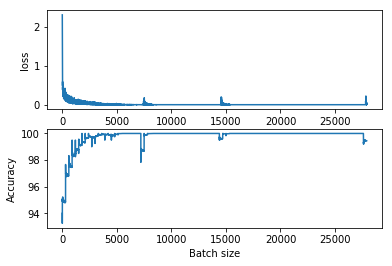

Epoch [94/200], Batch [100/300], Loss: 0.0061
Epoch [94/200], Batch [200/300], Loss: 0.0026
Epoch [94/200], Batch [300/300], Loss: 0.0001


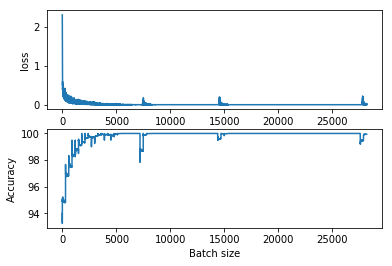

Epoch [95/200], Batch [100/300], Loss: 0.0004
Epoch [95/200], Batch [200/300], Loss: 0.0076
Epoch [95/200], Batch [300/300], Loss: 0.0000


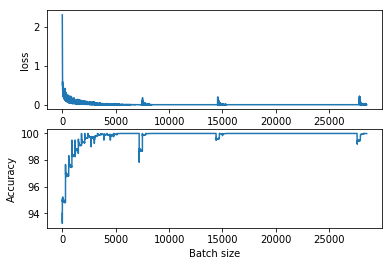

Epoch [96/200], Batch [100/300], Loss: 0.0003
Epoch [96/200], Batch [200/300], Loss: 0.0001
Epoch [96/200], Batch [300/300], Loss: 0.0002


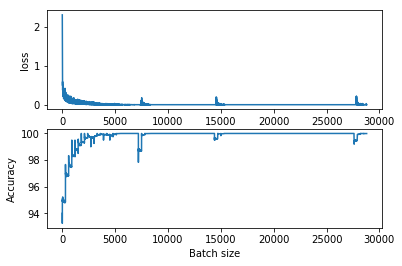

Epoch [97/200], Batch [100/300], Loss: 0.0000
Epoch [97/200], Batch [200/300], Loss: 0.0000
Epoch [97/200], Batch [300/300], Loss: 0.0000


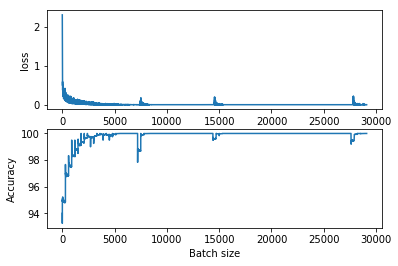

Epoch [98/200], Batch [100/300], Loss: 0.0002
Epoch [98/200], Batch [200/300], Loss: 0.0000
Epoch [98/200], Batch [300/300], Loss: 0.0000


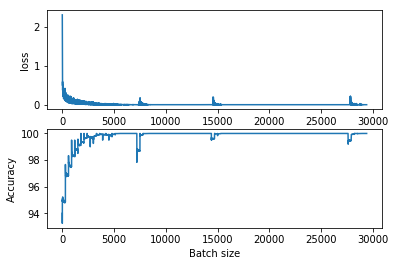

Epoch [99/200], Batch [100/300], Loss: 0.0001
Epoch [99/200], Batch [200/300], Loss: 0.0000
Epoch [99/200], Batch [300/300], Loss: 0.0000


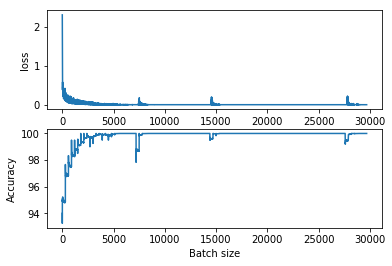

Epoch [100/200], Batch [100/300], Loss: 0.0000
Epoch [100/200], Batch [200/300], Loss: 0.0000
Epoch [100/200], Batch [300/300], Loss: 0.0000


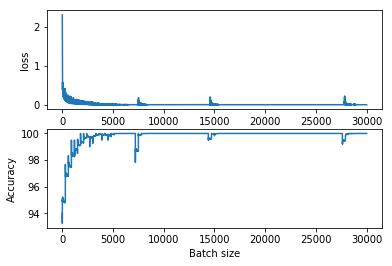

Epoch [101/200], Batch [100/300], Loss: 0.0000
Epoch [101/200], Batch [200/300], Loss: 0.0000
Epoch [101/200], Batch [300/300], Loss: 0.0000


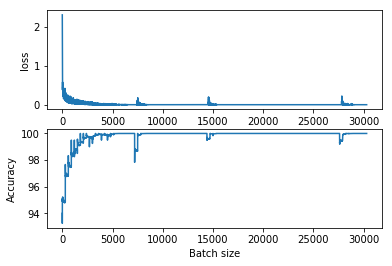

Epoch [102/200], Batch [100/300], Loss: 0.0000
Epoch [102/200], Batch [200/300], Loss: 0.0000
Epoch [102/200], Batch [300/300], Loss: 0.0000


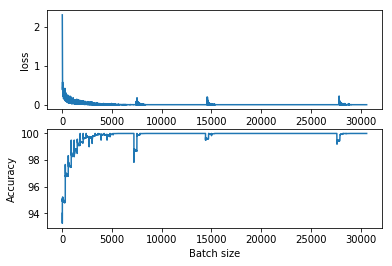

Epoch [103/200], Batch [100/300], Loss: 0.0000
Epoch [103/200], Batch [200/300], Loss: 0.0000
Epoch [103/200], Batch [300/300], Loss: 0.0000


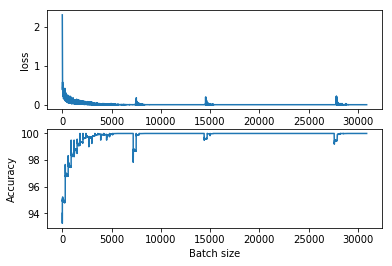

Epoch [104/200], Batch [100/300], Loss: 0.0000
Epoch [104/200], Batch [200/300], Loss: 0.0000
Epoch [104/200], Batch [300/300], Loss: 0.0000


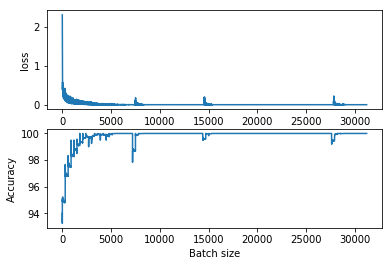

Epoch [105/200], Batch [100/300], Loss: 0.0000
Epoch [105/200], Batch [200/300], Loss: 0.0000
Epoch [105/200], Batch [300/300], Loss: 0.0000


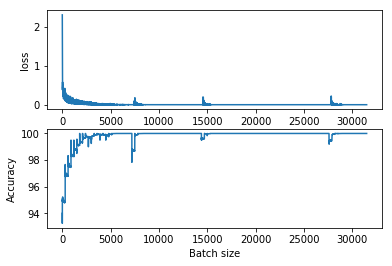

Epoch [106/200], Batch [100/300], Loss: 0.0000
Epoch [106/200], Batch [200/300], Loss: 0.0000
Epoch [106/200], Batch [300/300], Loss: 0.0000


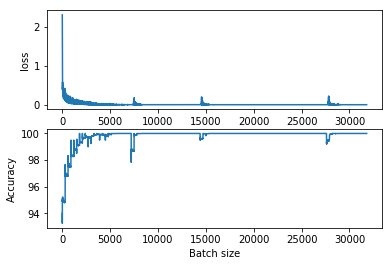

Epoch [107/200], Batch [100/300], Loss: 0.0000
Epoch [107/200], Batch [200/300], Loss: 0.0000
Epoch [107/200], Batch [300/300], Loss: 0.0000


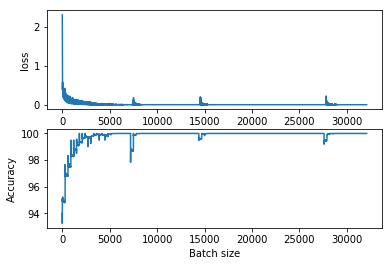

Epoch [108/200], Batch [100/300], Loss: 0.0000
Epoch [108/200], Batch [200/300], Loss: 0.0000
Epoch [108/200], Batch [300/300], Loss: 0.0000


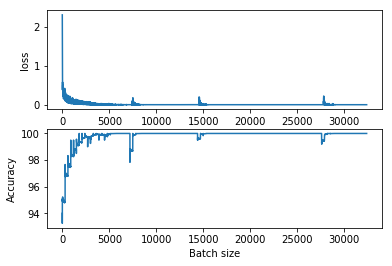

Epoch [109/200], Batch [100/300], Loss: 0.0000
Epoch [109/200], Batch [200/300], Loss: 0.0000
Epoch [109/200], Batch [300/300], Loss: 0.0000


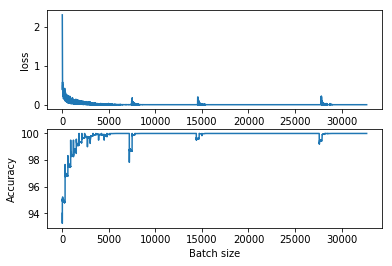

Epoch [110/200], Batch [100/300], Loss: 0.0000
Epoch [110/200], Batch [200/300], Loss: 0.0000
Epoch [110/200], Batch [300/300], Loss: 0.0000


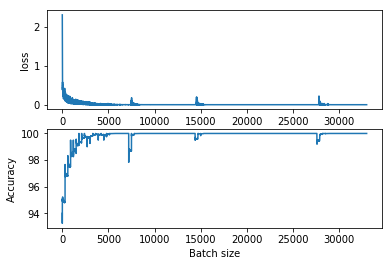

Epoch [111/200], Batch [100/300], Loss: 0.0000
Epoch [111/200], Batch [200/300], Loss: 0.0000
Epoch [111/200], Batch [300/300], Loss: 0.0000


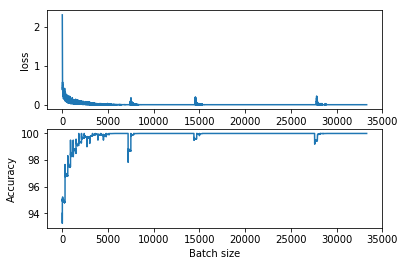

Epoch [112/200], Batch [100/300], Loss: 0.0000
Epoch [112/200], Batch [200/300], Loss: 0.0000
Epoch [112/200], Batch [300/300], Loss: 0.0000


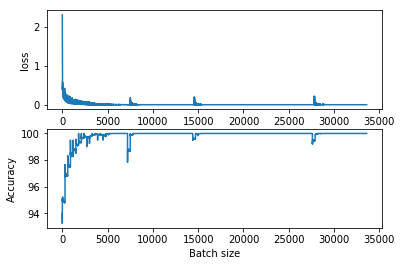

Epoch [113/200], Batch [100/300], Loss: 0.0000
Epoch [113/200], Batch [200/300], Loss: 0.0000
Epoch [113/200], Batch [300/300], Loss: 0.0000


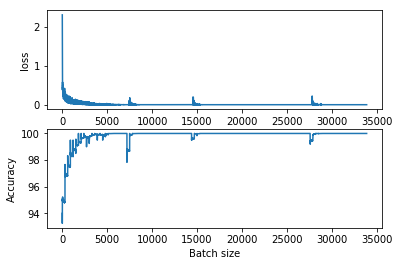

Epoch [114/200], Batch [100/300], Loss: 0.0000
Epoch [114/200], Batch [200/300], Loss: 0.0000
Epoch [114/200], Batch [300/300], Loss: 0.0000


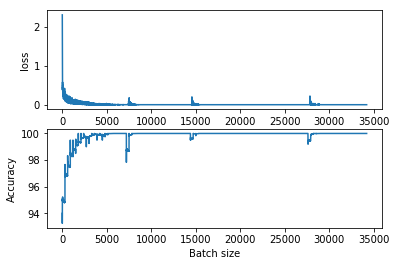

Epoch [115/200], Batch [100/300], Loss: 0.0000
Epoch [115/200], Batch [200/300], Loss: 0.0000
Epoch [115/200], Batch [300/300], Loss: 0.0000


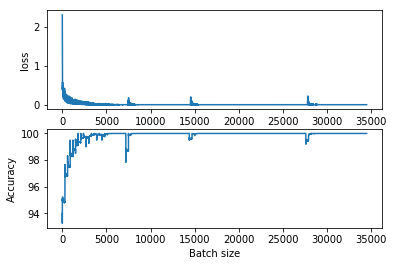

Epoch [116/200], Batch [100/300], Loss: 0.0000
Epoch [116/200], Batch [200/300], Loss: 0.0000
Epoch [116/200], Batch [300/300], Loss: 0.0000


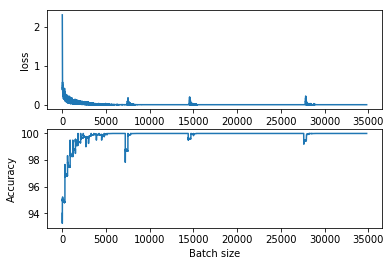

Epoch [117/200], Batch [100/300], Loss: 0.0000
Epoch [117/200], Batch [200/300], Loss: 0.0000
Epoch [117/200], Batch [300/300], Loss: 0.0000


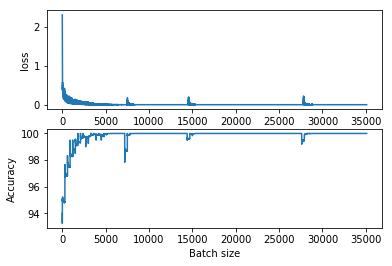

Epoch [118/200], Batch [100/300], Loss: 0.0000
Epoch [118/200], Batch [200/300], Loss: 0.0000
Epoch [118/200], Batch [300/300], Loss: 0.0000


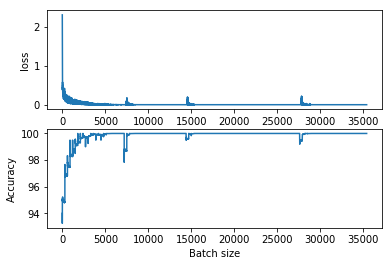

Epoch [119/200], Batch [100/300], Loss: 0.0000
Epoch [119/200], Batch [200/300], Loss: 0.0000
Epoch [119/200], Batch [300/300], Loss: 0.0000


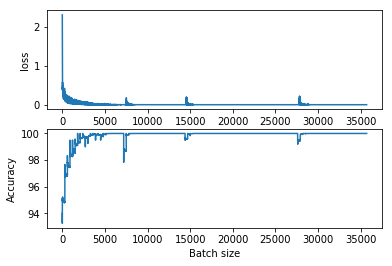

Epoch [120/200], Batch [100/300], Loss: 0.0000
Epoch [120/200], Batch [200/300], Loss: 0.0000
Epoch [120/200], Batch [300/300], Loss: 0.0000


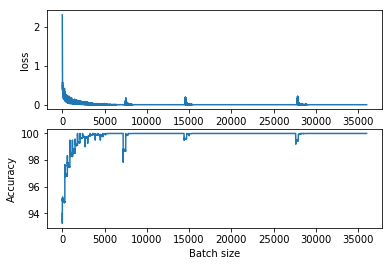

Epoch [121/200], Batch [100/300], Loss: 0.0000
Epoch [121/200], Batch [200/300], Loss: 0.0000
Epoch [121/200], Batch [300/300], Loss: 0.0000


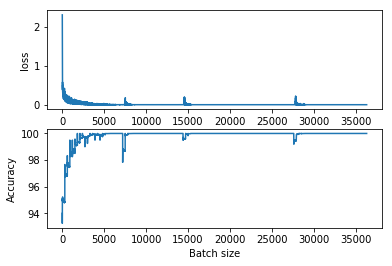

Epoch [122/200], Batch [100/300], Loss: 0.0000
Epoch [122/200], Batch [200/300], Loss: 0.0000
Epoch [122/200], Batch [300/300], Loss: 0.0000


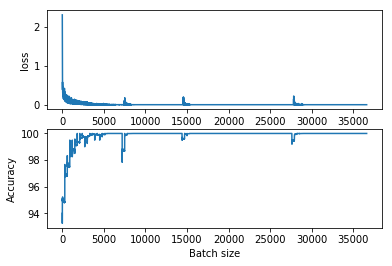

Epoch [123/200], Batch [100/300], Loss: 0.0000
Epoch [123/200], Batch [200/300], Loss: 0.0000
Epoch [123/200], Batch [300/300], Loss: 0.0000


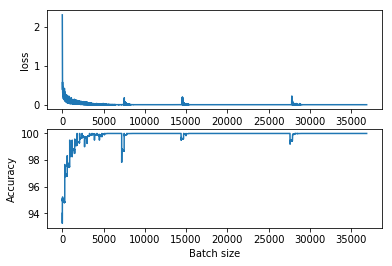

Epoch [124/200], Batch [100/300], Loss: 0.0000
Epoch [124/200], Batch [200/300], Loss: 0.0000
Epoch [124/200], Batch [300/300], Loss: 0.0000


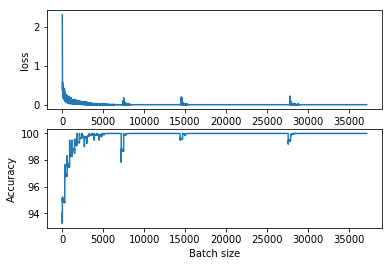

Epoch [125/200], Batch [100/300], Loss: 0.0000
Epoch [125/200], Batch [200/300], Loss: 0.0000
Epoch [125/200], Batch [300/300], Loss: 0.0000


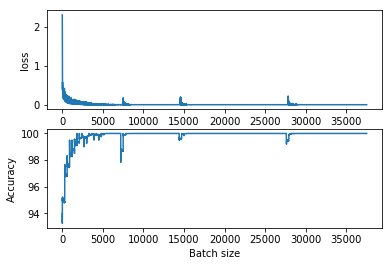

Epoch [126/200], Batch [100/300], Loss: 0.0000
Epoch [126/200], Batch [200/300], Loss: 0.0000
Epoch [126/200], Batch [300/300], Loss: 0.0000


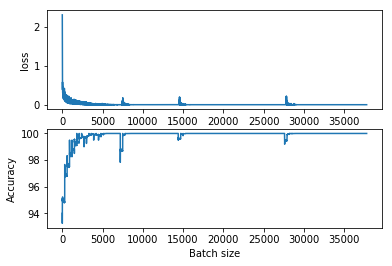

Epoch [127/200], Batch [100/300], Loss: 0.0000
Epoch [127/200], Batch [200/300], Loss: 0.0000
Epoch [127/200], Batch [300/300], Loss: 0.0000


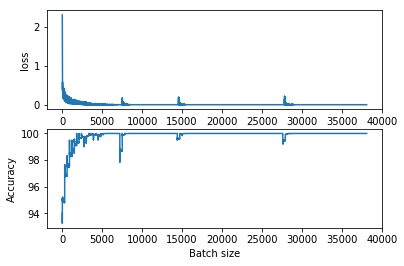

Epoch [128/200], Batch [100/300], Loss: 0.0000
Epoch [128/200], Batch [200/300], Loss: 0.0000
Epoch [128/200], Batch [300/300], Loss: 0.0000


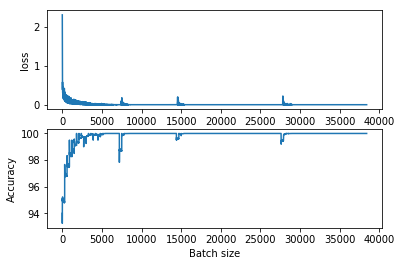

Epoch [129/200], Batch [100/300], Loss: 0.0000
Epoch [129/200], Batch [200/300], Loss: 0.0000
Epoch [129/200], Batch [300/300], Loss: 0.0000


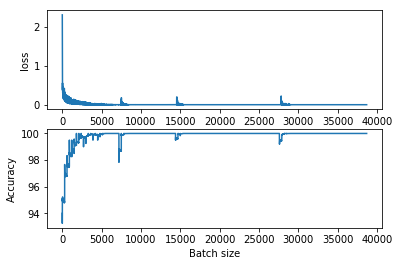

Epoch [130/200], Batch [100/300], Loss: 0.0000
Epoch [130/200], Batch [200/300], Loss: 0.0000
Epoch [130/200], Batch [300/300], Loss: 0.0000


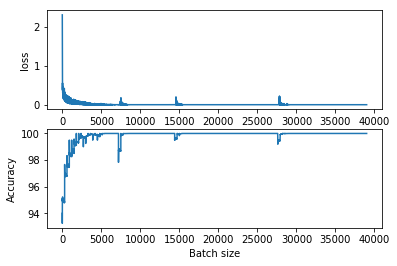

Epoch [131/200], Batch [100/300], Loss: 0.0000
Epoch [131/200], Batch [200/300], Loss: 0.0000
Epoch [131/200], Batch [300/300], Loss: 0.0000


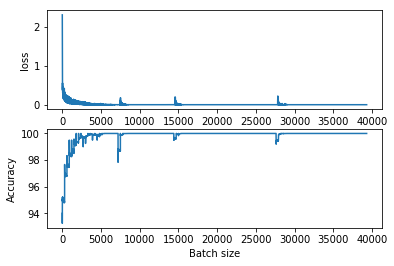

Epoch [132/200], Batch [100/300], Loss: 0.0000
Epoch [132/200], Batch [200/300], Loss: 0.0000
Epoch [132/200], Batch [300/300], Loss: 0.0000


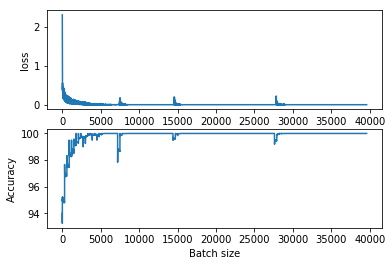

Epoch [133/200], Batch [100/300], Loss: 0.0000
Epoch [133/200], Batch [200/300], Loss: 0.0000
Epoch [133/200], Batch [300/300], Loss: 0.0000


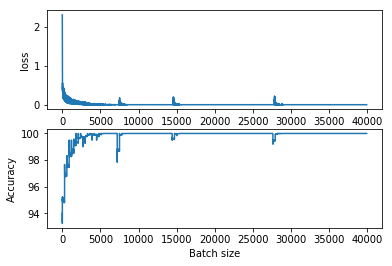

Epoch [134/200], Batch [100/300], Loss: 0.0000
Epoch [134/200], Batch [200/300], Loss: 0.0000
Epoch [134/200], Batch [300/300], Loss: 0.0000


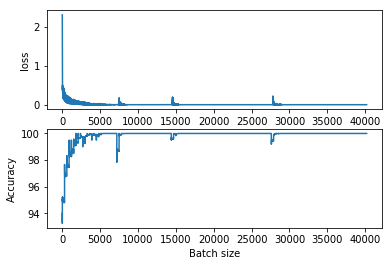

Epoch [135/200], Batch [100/300], Loss: 0.0000
Epoch [135/200], Batch [200/300], Loss: 0.0000
Epoch [135/200], Batch [300/300], Loss: 0.0000


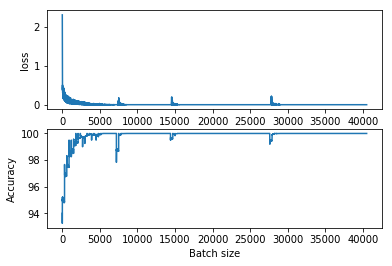

Epoch [136/200], Batch [100/300], Loss: 0.0000
Epoch [136/200], Batch [200/300], Loss: 0.0000
Epoch [136/200], Batch [300/300], Loss: 0.0000


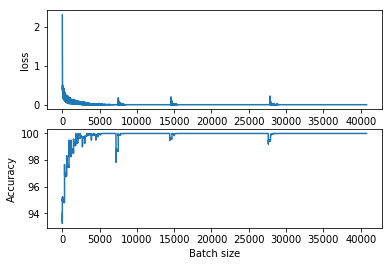

Epoch [137/200], Batch [100/300], Loss: 0.0000
Epoch [137/200], Batch [200/300], Loss: 0.0000
Epoch [137/200], Batch [300/300], Loss: 0.0000


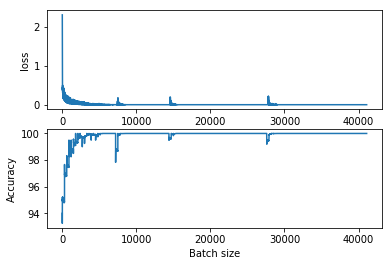

Epoch [138/200], Batch [100/300], Loss: 0.0000
Epoch [138/200], Batch [200/300], Loss: 0.0000
Epoch [138/200], Batch [300/300], Loss: 0.0000


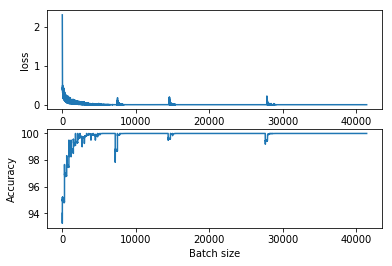

Epoch [139/200], Batch [100/300], Loss: 0.0000
Epoch [139/200], Batch [200/300], Loss: 0.0000
Epoch [139/200], Batch [300/300], Loss: 0.0000


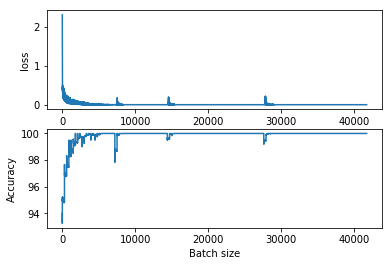

Epoch [140/200], Batch [100/300], Loss: 0.0000
Epoch [140/200], Batch [200/300], Loss: 0.0000
Epoch [140/200], Batch [300/300], Loss: 0.0000


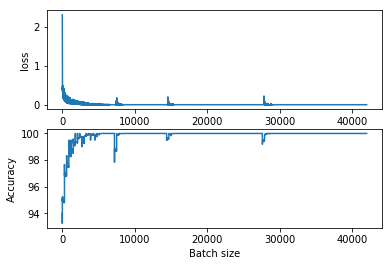

Epoch [141/200], Batch [100/300], Loss: 0.0000
Epoch [141/200], Batch [200/300], Loss: 0.0000
Epoch [141/200], Batch [300/300], Loss: 0.0000


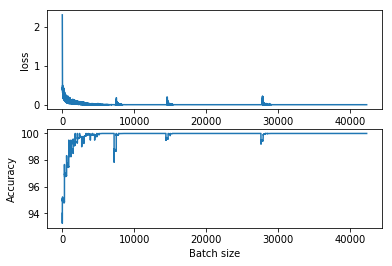

Epoch [142/200], Batch [100/300], Loss: 0.0000
Epoch [142/200], Batch [200/300], Loss: 0.0000
Epoch [142/200], Batch [300/300], Loss: 0.0000


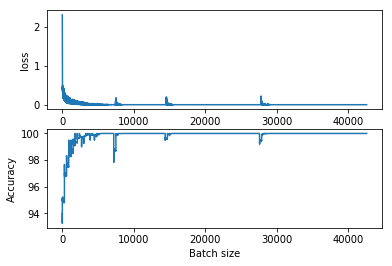

Epoch [143/200], Batch [100/300], Loss: 0.0000
Epoch [143/200], Batch [200/300], Loss: 0.0000
Epoch [143/200], Batch [300/300], Loss: 0.0000


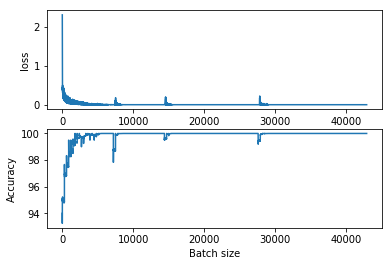

Epoch [144/200], Batch [100/300], Loss: 0.0000
Epoch [144/200], Batch [200/300], Loss: 0.0000
Epoch [144/200], Batch [300/300], Loss: 0.0000


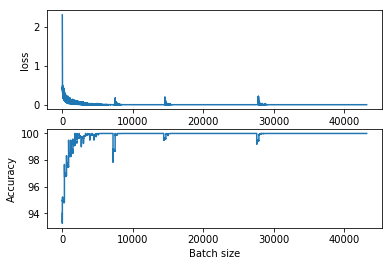

Epoch [145/200], Batch [100/300], Loss: 0.0000
Epoch [145/200], Batch [200/300], Loss: 0.0000
Epoch [145/200], Batch [300/300], Loss: 0.0000


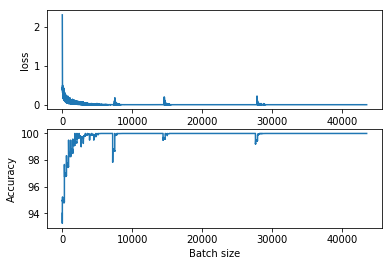

Epoch [146/200], Batch [100/300], Loss: 0.0000
Epoch [146/200], Batch [200/300], Loss: 0.0000
Epoch [146/200], Batch [300/300], Loss: 0.0000


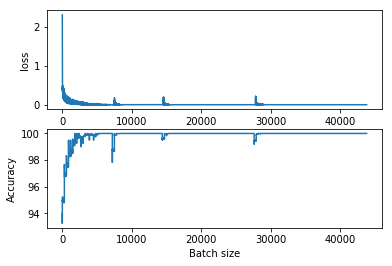

Epoch [147/200], Batch [100/300], Loss: 0.0000
Epoch [147/200], Batch [200/300], Loss: 0.0000
Epoch [147/200], Batch [300/300], Loss: 0.0000


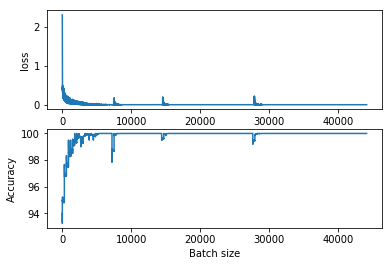

Epoch [148/200], Batch [100/300], Loss: 0.0000
Epoch [148/200], Batch [200/300], Loss: 0.0000
Epoch [148/200], Batch [300/300], Loss: 0.0000


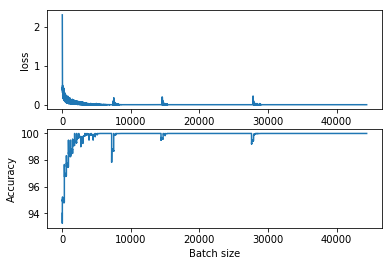

Epoch [149/200], Batch [100/300], Loss: 0.0000
Epoch [149/200], Batch [200/300], Loss: 0.0000
Epoch [149/200], Batch [300/300], Loss: 0.0000


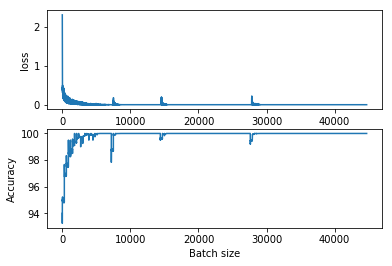

Epoch [150/200], Batch [100/300], Loss: 0.0000
Epoch [150/200], Batch [200/300], Loss: 0.0000
Epoch [150/200], Batch [300/300], Loss: 0.0000


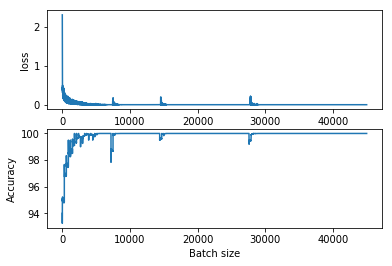

Epoch [151/200], Batch [100/300], Loss: 0.0000
Epoch [151/200], Batch [200/300], Loss: 0.0000
Epoch [151/200], Batch [300/300], Loss: 0.0000


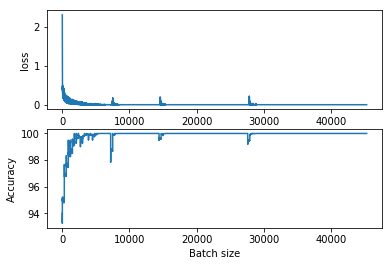

Epoch [152/200], Batch [100/300], Loss: 0.0000
Epoch [152/200], Batch [200/300], Loss: 0.0000
Epoch [152/200], Batch [300/300], Loss: 0.0000


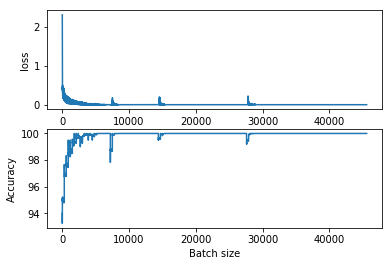

Epoch [153/200], Batch [100/300], Loss: 0.0000
Epoch [153/200], Batch [200/300], Loss: 0.0000
Epoch [153/200], Batch [300/300], Loss: 0.0000


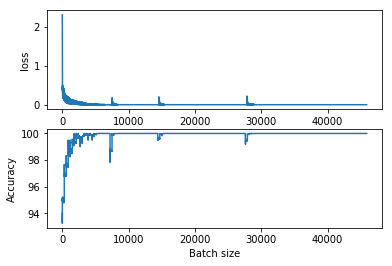

Epoch [154/200], Batch [100/300], Loss: 0.0000
Epoch [154/200], Batch [200/300], Loss: 0.0000
Epoch [154/200], Batch [300/300], Loss: 0.0000


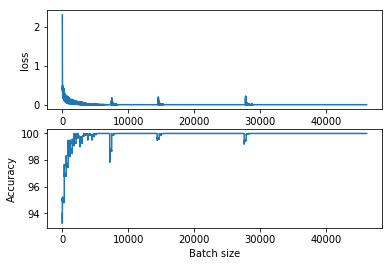

Epoch [155/200], Batch [100/300], Loss: 0.0000
Epoch [155/200], Batch [200/300], Loss: 0.0000
Epoch [155/200], Batch [300/300], Loss: 0.0000


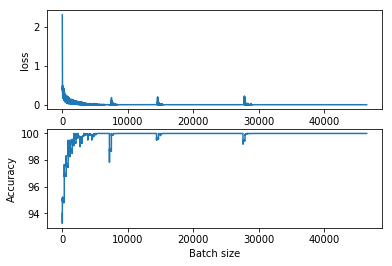

Epoch [156/200], Batch [100/300], Loss: 0.0000
Epoch [156/200], Batch [200/300], Loss: 0.0000
Epoch [156/200], Batch [300/300], Loss: 0.0000


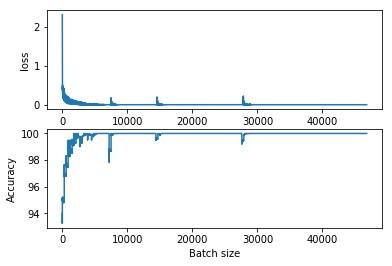

Epoch [157/200], Batch [100/300], Loss: 0.0000
Epoch [157/200], Batch [200/300], Loss: 0.0000
Epoch [157/200], Batch [300/300], Loss: 0.0000


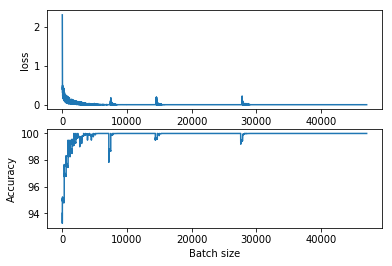

Epoch [158/200], Batch [100/300], Loss: 0.0000
Epoch [158/200], Batch [200/300], Loss: 0.0000
Epoch [158/200], Batch [300/300], Loss: 0.0000


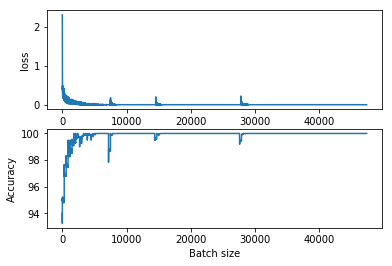

Epoch [159/200], Batch [100/300], Loss: 0.0000
Epoch [159/200], Batch [200/300], Loss: 0.0000
Epoch [159/200], Batch [300/300], Loss: 0.0000


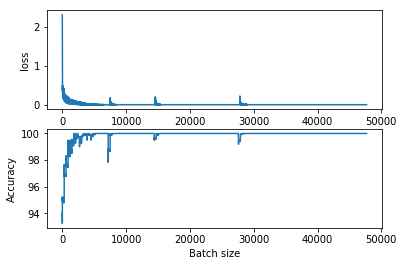

Epoch [160/200], Batch [100/300], Loss: 0.0000
Epoch [160/200], Batch [200/300], Loss: 0.0000
Epoch [160/200], Batch [300/300], Loss: 0.0000


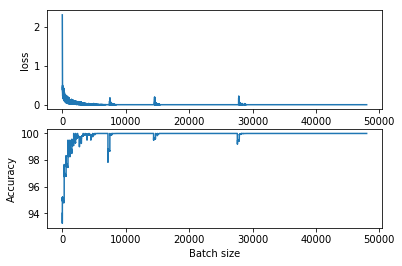

Epoch [161/200], Batch [100/300], Loss: 0.0000
Epoch [161/200], Batch [200/300], Loss: 0.0000
Epoch [161/200], Batch [300/300], Loss: 0.0000


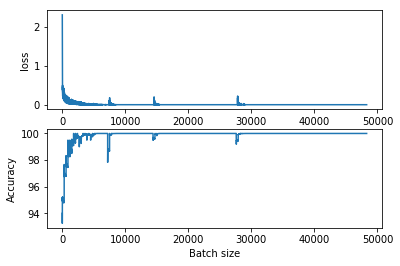

Epoch [162/200], Batch [100/300], Loss: 0.0000
Epoch [162/200], Batch [200/300], Loss: 0.0000
Epoch [162/200], Batch [300/300], Loss: 0.0000


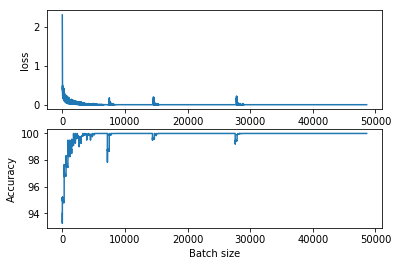

Epoch [163/200], Batch [100/300], Loss: 0.0000
Epoch [163/200], Batch [200/300], Loss: 0.0000
Epoch [163/200], Batch [300/300], Loss: 0.0000


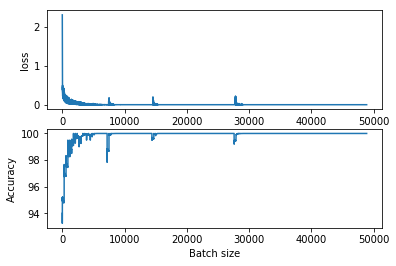

Epoch [164/200], Batch [100/300], Loss: 0.0000
Epoch [164/200], Batch [200/300], Loss: 0.0000
Epoch [164/200], Batch [300/300], Loss: 0.0000


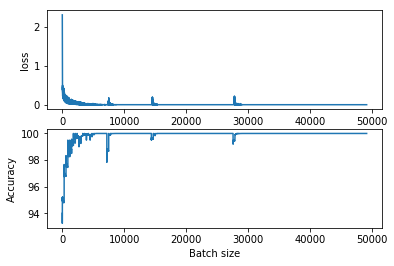

Epoch [165/200], Batch [100/300], Loss: 0.0000
Epoch [165/200], Batch [200/300], Loss: 0.0000
Epoch [165/200], Batch [300/300], Loss: 0.0000


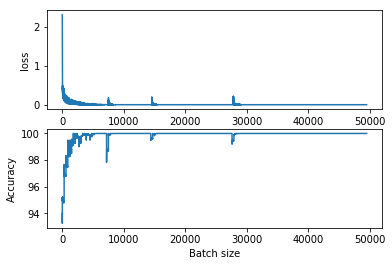

Epoch [166/200], Batch [100/300], Loss: 0.0000
Epoch [166/200], Batch [200/300], Loss: 0.0000
Epoch [166/200], Batch [300/300], Loss: 0.0000


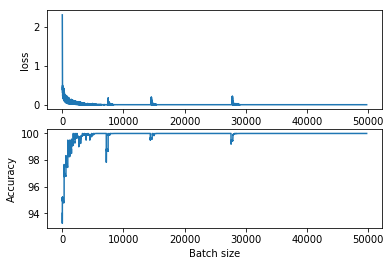

Epoch [167/200], Batch [100/300], Loss: 0.0000
Epoch [167/200], Batch [200/300], Loss: 0.0000
Epoch [167/200], Batch [300/300], Loss: 0.0000


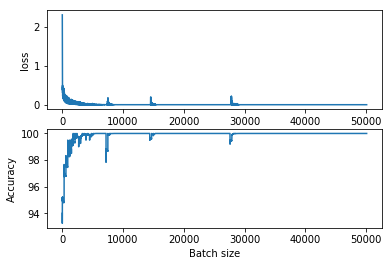

Epoch [168/200], Batch [100/300], Loss: 0.0000
Epoch [168/200], Batch [200/300], Loss: 0.0000
Epoch [168/200], Batch [300/300], Loss: 0.0000


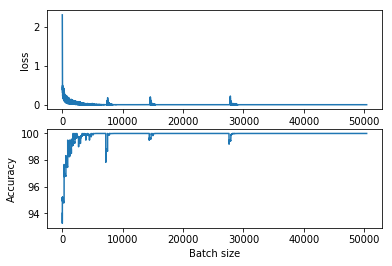

Epoch [169/200], Batch [100/300], Loss: 0.0000
Epoch [169/200], Batch [200/300], Loss: 0.0000
Epoch [169/200], Batch [300/300], Loss: 0.0000


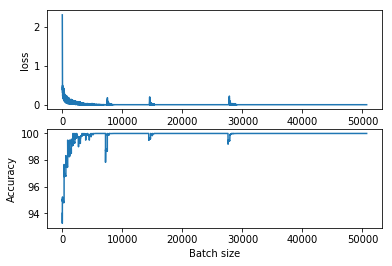

Epoch [170/200], Batch [100/300], Loss: 0.0000
Epoch [170/200], Batch [200/300], Loss: 0.0000


In [ ]:
fig = plt.figure()
mini_batch = 100
plot_every = 10
all_losses = []
taccuracy = []
for batch in range(batch_size):
    for i, (images, labels) in enumerate(train_loader): # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))  # Convert torch tensor to Variable: change image from a vector 
                                                   # of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        optimizer.zero_grad() #IAS: Intialize the hidden <strike>weight</strike> GRADIENT to all zeros
        outputs = net(images) # Forward pass with a specified mini batch: compute the output class given a image
        loss = criterion(outputs, labels) # Compute the loss: difference between the output class and the pre-given label
        loss.backward()# Backward pass: compute the weight
        optimizer.step()# Optimizer: UPDATE the weights of hidden nodes
        
        if (i+1) % mini_batch == 0: # Logging
            print('Epoch [%d/%d], Batch [%d/%d], Loss: %.4f'
                 %(batch+1, batch_size, i+1, len(train_dataset)//batch_size, loss.data[0]))        
        all_losses.append(loss.data[0])
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
        total += labels.size(0)                    # Increment the total count
        correct += (predicted == labels).sum()     # Increment the correct count
        
#Calculating the accuracy and appending it to taccuracy         
        taccuracy.append(100 * correct / total) 
#After every mini-batch, plotting the loss function and training accuracy.    
    plt.subplot(211)
    plt.plot(all_losses)
    plt.xlabel("Batch size")
    plt.ylabel("loss")
    plt.subplot(212)
    plt.plot(taccuracy)
    plt.xlabel("Batch size")
    plt.ylabel("Accuracy")
    plt.show()

In [ ]:
mini_batch = 100
#plot_every = 10
all_losses = []
test_accuracy = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(test_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = net(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        if (i+1) % mini_batch == 0:                              # Logging
            print('Epoch [%d/%d], Batch [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(test_dataset)//batch_size, loss.data[0]))
        all_losses.append(loss.data[0])
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
        total += labels.size(0)                    # Increment the total count
        correct += (predicted == labels).sum()     # Increment the correct count
        #Calculating the Test Accuracy and appending it to test_accuracy
        test_accuracy.append(100 * correct / total) 
    #After every epoch, plotting the test accuracies       
    plt.plot(test_accuracy)
    plt.xlabel("Batch Size")
    plt.ylabel("Test Accuracy")
    plt.show()

# Exercise 1: 

Change the batch size to 200 and try calculating the loss and accuracy for both the training and testing data

# Exercise 2:

Change the batch size to 5 and mini batch to 1000. Try calculating the loss and accuracy for both the training and testing data